# FREDDY FERNANDES
freddy.fernandes@studio.unibo.it

## TASK 1: Fruit Segmentation and Defect Detection

In [31]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

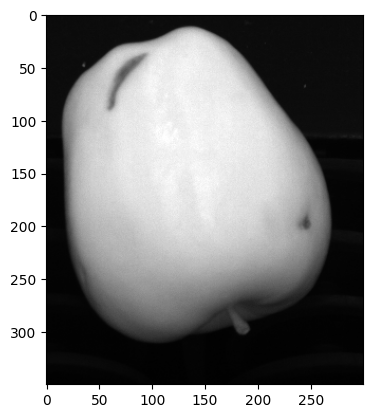

In [33]:
image = cv2.imread("first task/C0_000001.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')
plt.show()


Finding a threshold using histograms

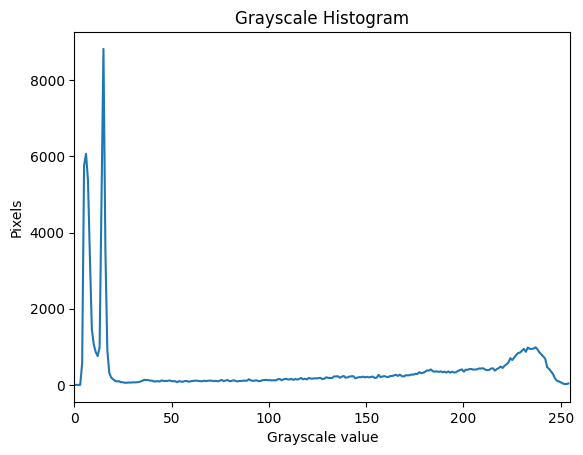

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_for_thresholding(image):
    # Calculating the histogram of the grayscale image
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 255))

    # Plotting the histogram
    plt.figure()
    plt.title("Grayscale Histogram")
    plt.xlabel("Grayscale value")
    plt.ylabel("Pixels")

    plt.xlim([0, 255])  # Setting the x-axis limit
    plt.plot(bin_edges[0:-1], histogram)  
    plt.show()

plot_histogram_for_thresholding(image)

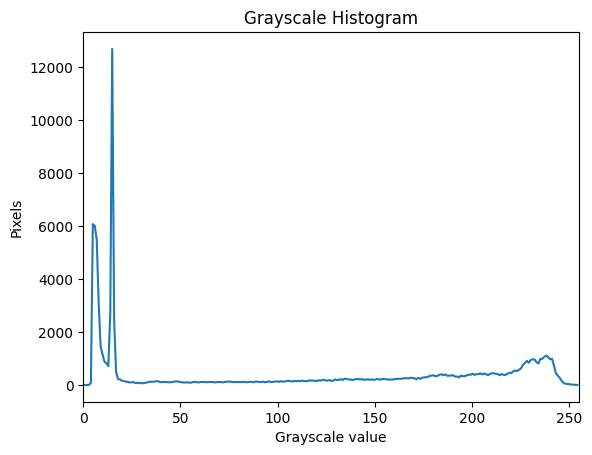

In [35]:
#applying gaussian smoothing
smooth= cv2.GaussianBlur(image, (5,5), 0)
plot_histogram_for_thresholding(smooth)

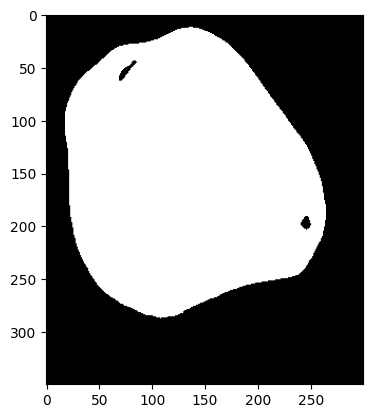

In [36]:
_, mask = cv2.threshold(smooth,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(mask, cmap="gray", vmin=0,vmax=1)
plt.show()

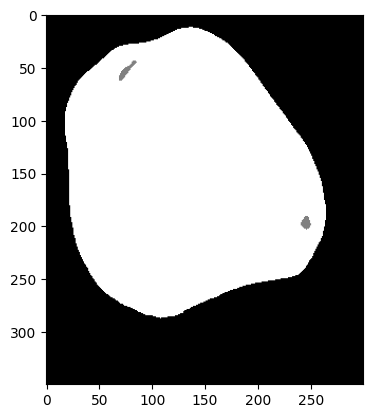

In [37]:
flood_mask = mask + 1
cv2.floodFill(flood_mask, None, (0,0), 0)
plt.imshow(flood_mask, cmap='gray', vmin=0, vmax=2)
plt.show()

Edge Detection

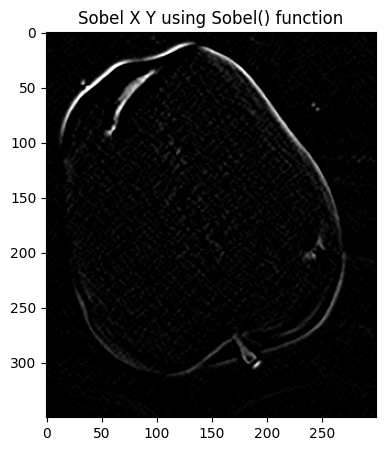

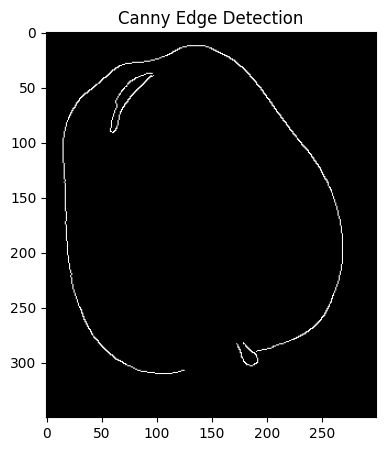

In [38]:
#Sobel Edge Detection
sobelxy = cv2.Sobel(src=smooth, ddepth=cv2.CV_8U, dx=1, dy=1, ksize=5)  # Combined X and Y Sobel Edge Detection

# Display Sobel Edge Detection Images
plt.figure(figsize=(5, 5))
plt.imshow(sobelxy, cmap='gray')
plt.title('Sobel X Y using Sobel() function')
plt.show()

# Canny Edge Detection
edges = cv2.Canny(image=smooth, threshold1=50, threshold2=200)  # Canny Edge Detection

# Display Canny Edge Detection Image
plt.figure(figsize=(5, 5))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


Depending on the value of the thresholds, I found this range to be okay as i am not detecting the hole in base of apple 

In [39]:
mask.shape

(350, 300)

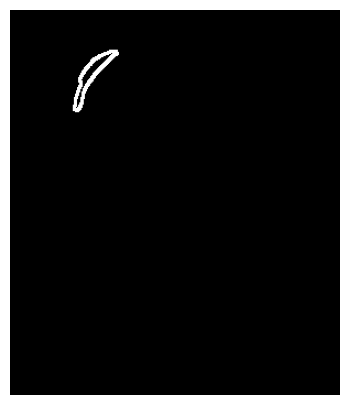

In [40]:
edges_def = edges
kernel = np.ones((3,3))
# Perform opening (erosion followed by dilation) on the edge map
eroded_mask = cv2.erode(flood_mask, kernel, iterations = 1)
edge = edges_def * eroded_mask
edge1 = cv2.dilate(edge, kernel, iterations = 1)
edges_def = edge1
# Display the processed edge map
plt.figure(figsize=(5,5))
plt.axis("off")
plt.imshow(edges_def, cmap='gray', vmin=0, vmax=255)
plt.show()




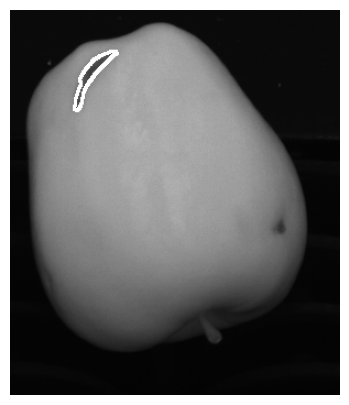

In [41]:
image1 = cv2.imread("first task/C0_000001.png",cv2.IMREAD_GRAYSCALE)

#type checking
edge2 = edge1.astype(image1.dtype)

# Overlap the images
overlap = cv2.addWeighted(image1, 0.7, edge2, 0.7, 0)

# Display the overlapped image
plt.figure(figsize=(5,5))
plt.axis("off")
plt.imshow(overlap, cmap='gray', vmin=0, vmax=255)
plt.show()


So I am able to detect the Defects in the apple image. I will do this for all the images in task 1 now 

In [42]:
# List of image filenames
image_list = ["C0_000001.png", "C0_000002.png", "C0_000003.png"]

# Initialize the dictionary to store the images and masks
images = []
masks= []
# First loop: Load the images, apply Gaussian blur, and perform thresholding
for i in image_list:
    # Load the image in grayscale
    image = cv2.imread(f"first task/{i}", cv2.IMREAD_GRAYSCALE)
    # Apply Gaussian blur
    image = cv2.GaussianBlur(image, (5,5), 0)
    images.append(image)
    # Threshold the image
    _, mask = cv2.threshold(image, 0, 1, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    masks.append(mask)

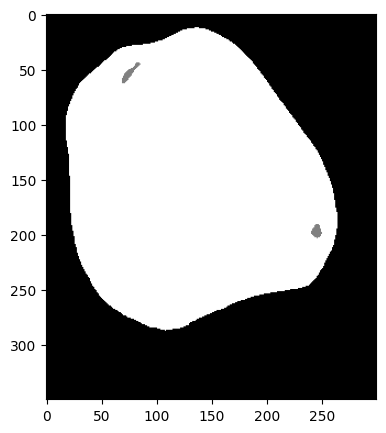

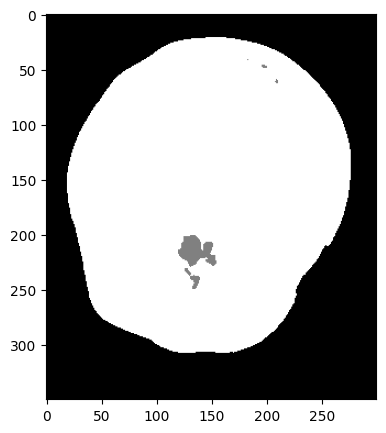

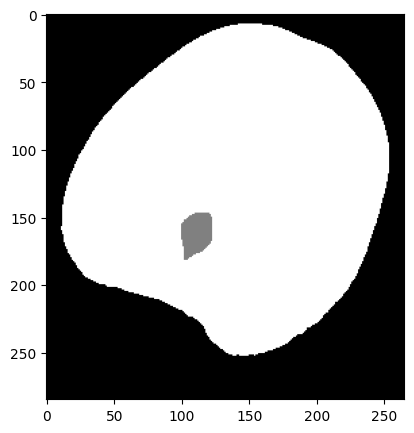

In [50]:
flood_masks= []
for mask in masks:
    flood_fill_mask = mask + 1 
    h, w = flood_fill_mask.shape
    mask_for_floodfill = np.zeros((h + 2, w + 2), np.uint8)
    # The starting point for the fill is (0,0)
    # The value '0' is filled in the areas connected to (0,0) and similar to it in the mask
    cv2.floodFill(flood_fill_mask, mask_for_floodfill, (0,0), 0)
    flood_masks.append(flood_fill_mask)
    # Display the flood-filled mask:
    plt.figure(figsize=(5,5))
    plt.imshow(flood_fill_mask, cmap='gray')    
    plt.show()


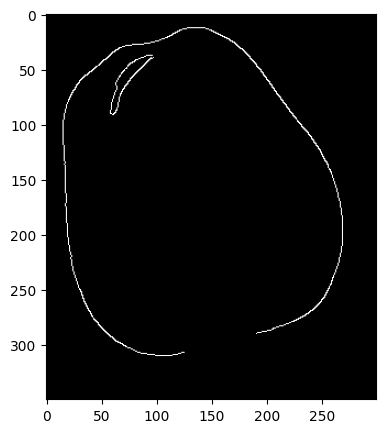

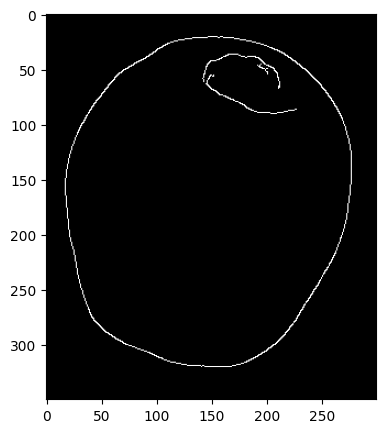

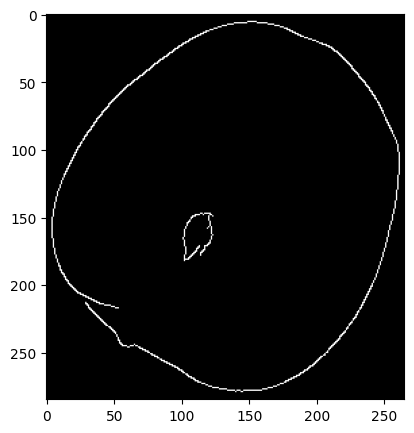

In [49]:
#Perform edge detection
edges= []
for image in images:
    # Perform edge detection
    edge = cv2.Canny(image=image, threshold1=40, threshold2=230) # Canny Edge Detection
    edges.append(edge)
    
    plt.figure(figsize=(5,5))
    plt.imshow(edge, cmap='gray')
    plt.show()

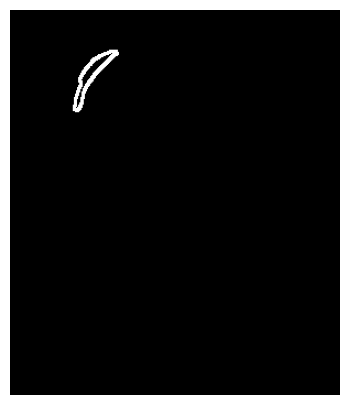

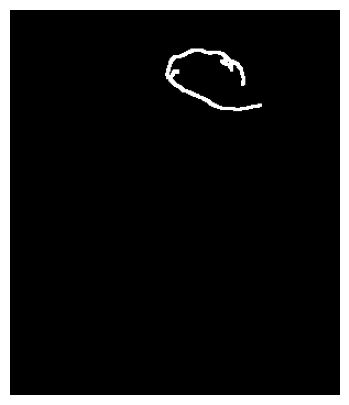

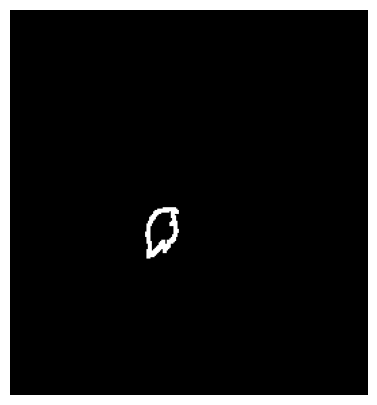

In [45]:
edges_defects = edges

for i, mask in enumerate(flood_masks):
    kernel = np.ones((3,3))
# Perform opening (erosion followed by dilation) on the edge map
    eroded = cv2.erode(mask, kernel, iterations=1)
    edge = edges_defects[i] * eroded
    edge1 = cv2.dilate(edge, kernel, iterations = 1)
    edges_defects[i] =(edge1)
# Display the processed edge map
    plt.figure(figsize=(5,5))
    plt.axis("off")
    plt.imshow(edge1, cmap='gray', vmin=0, vmax=255)
    plt.show()


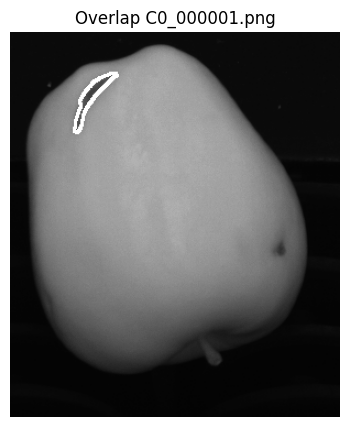

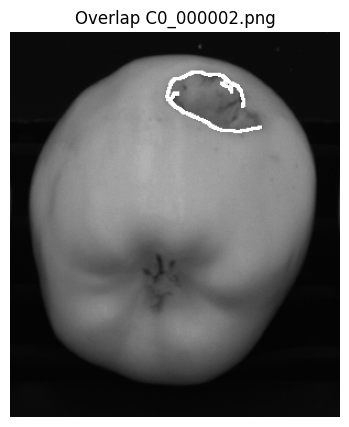

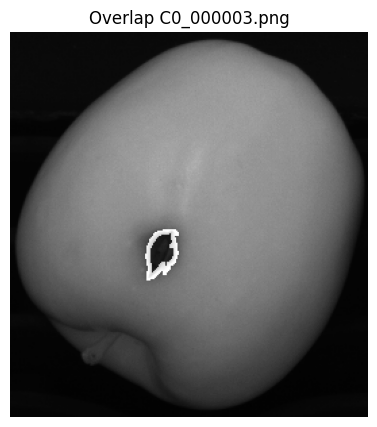

In [46]:
import cv2
import matplotlib.pyplot as plt

# List of image filenames
image_filenames = ["C0_000001.png", "C0_000002.png", "C0_000003.png"]

# Loop over the images and their corresponding edge maps
for image_filename, edge_map in zip(image_filenames, edges_defects):
    # Load the original image in grayscale
    original_image = cv2.imread(f"first task/{image_filename}", cv2.IMREAD_GRAYSCALE)

    # Ensure the edge map is in the same data type as the original image
    edge_map = edge_map.astype(original_image.dtype)

    # Overlap the original image and the edge map
    overlap = cv2.addWeighted(original_image, 0.7, edge_map, 0.7, 0)

    # Display the overlapped image
    plt.figure(figsize=(5,5))
    plt.axis("off")
    plt.imshow(overlap, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Overlap {image_filename}')
    plt.show()
